In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import string
from matplotlib import pyplot as plt


In [2]:
asciis = list(filter(lambda a: a.isprintable(), string.printable))
asciis = "".join(asciis)

asciis

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [3]:
fnt = ImageFont.truetype("fonts/CascadiaMono.ttf", 12)
bbox = fnt.getbbox(asciis)
width, height = bbox[2], bbox[3]
letter_width = width / len(asciis)

print(bbox)
print(width, height)
print(letter_width)
print(height / letter_width)

(0, 1, 665, 15)
665 15
7.0
2.142857142857143


In [4]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))
img

In [5]:
for i in range(0, len(asciis)):
    img_d.line([(i * letter_width, 0), (i * letter_width, height)], fill=255, width=1)

img

In [6]:
img_d.line([(0, height//2), (width, height//2)], fill=255, width=1)

img

In [7]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))

img

(73, 1)
0.7684210526315789


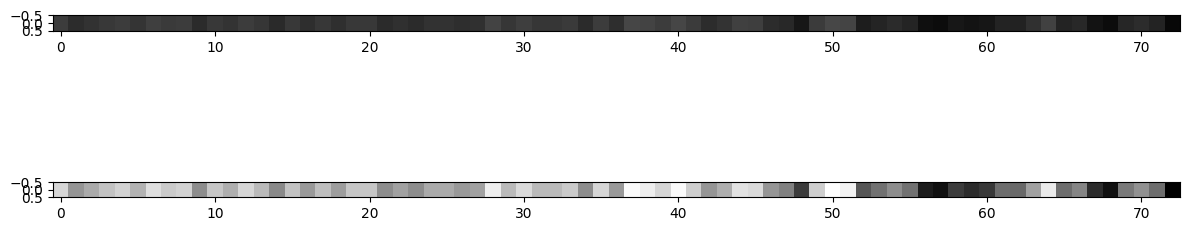

In [8]:
scale = 1/9
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(221, 5)
2.3263157894736843


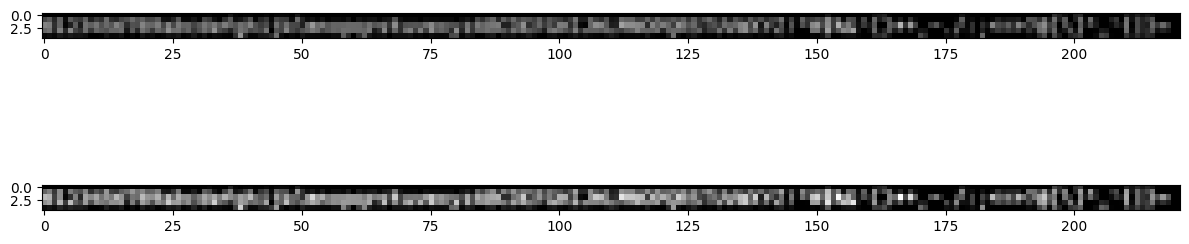

In [9]:
scale = 1/3
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(147, 6)
1.5473684210526315


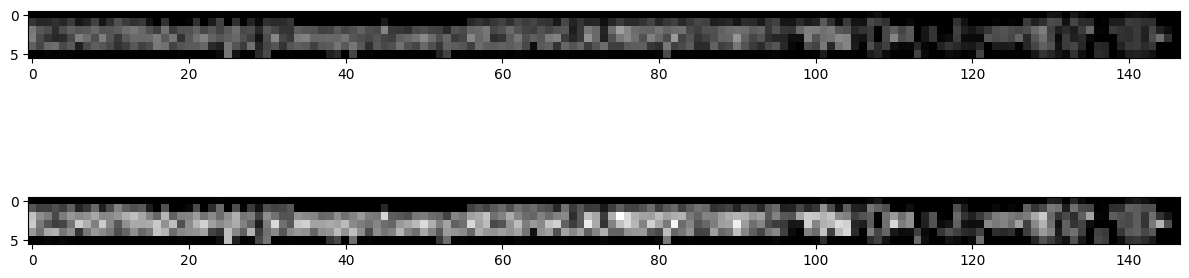

In [10]:
w_scale = 2/9
h_scale = 8/19
resized_box = (int(img.width * w_scale), int(img.height * h_scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

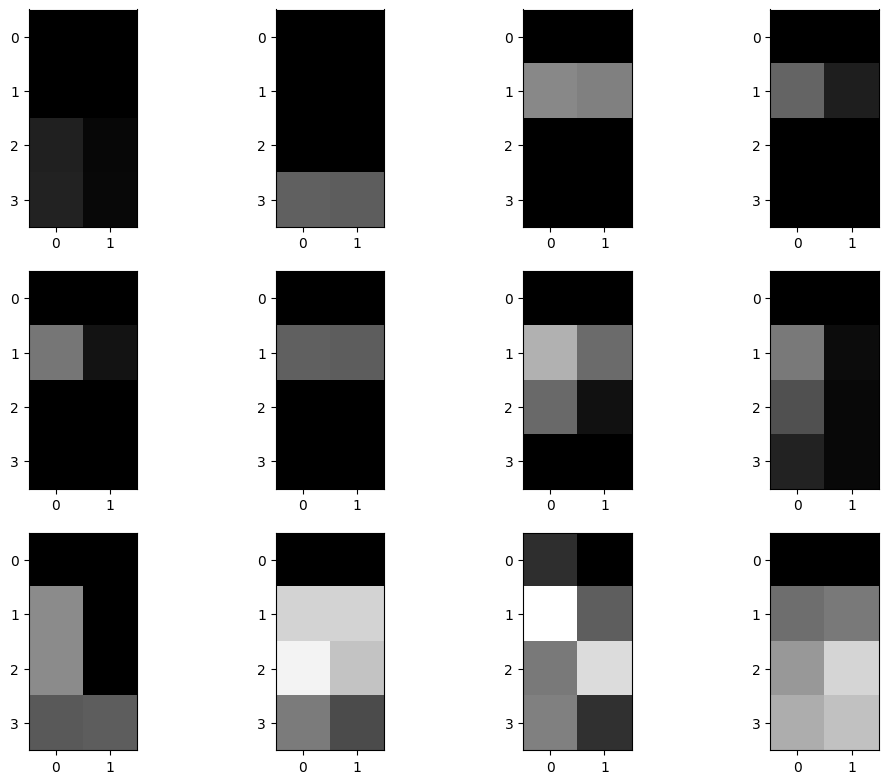

In [11]:
from generate_ascii_palette import generate_brightness_map

char_set = "._^`'-+!L@$g"
brightness_map = generate_brightness_map(char_set, fnt, (2,4), normalize=True)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)


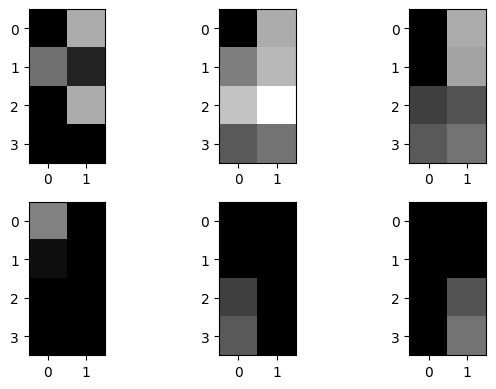

In [12]:
char_set = "⠪⣾⣘⠁⡀⢀"
brightness_map = generate_brightness_map(char_set, fnt, (2,4), normalize=True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)
